<p style="text-align: center; font-weight: bold; font-size: 16pt;font-family: "Computer Modern", sans-serif">Problem Set 2 </p> 
<p style="text-align: right; font-size: 12pt; font-family: "Computer Modern", sans-serif">Erik Butcher</p>

#### Q.1 
\begin{align}
E = E^o + \frac{RT}{nF}ln\Bigl(\frac{[Ox]}{[R]}\Bigr)= E^o + \frac{0.059}{n}log_{10}\Bigl(\frac{[Ox]}{[R]}\Bigr) \\ \; \\
Fe^{3+} + e^- \rightarrow Fe^{2+} & \Leftarrow \boxed{ \texttt{Gain of electron - Reduction}} \\ \; \\
[Re] + e^- \rightarrow [Ox] \\ \; \\
Answer \;(both \; valid): \\
\boldsymbol{ c) \;\; E = E^o + \frac{0.059}{n}ln\Bigl(\frac{[Fe^{3+}]}{[Fe^{2+}]}\Bigr)} \\ \; \\
\boldsymbol{ d) \;\; E = E^o - \frac{0.059}{n}ln\Bigl(\frac{[Fe^{2+}]}{[Fe^{3+}]}\Bigr)} 
\end{align}

#### Q.2
\begin{align*}
E_{probe} = K + 0.059\cdot log[F^-] \\ \; \\
E_{probe} = V\cdot q & \Leftarrow \boxed{ \texttt{charge ratiometric, so regarded as 1}} \\ \; \\
V_0 = K + 0.059\cdot log[F^-] \\ \; \\
0.112V = K + 0.059\cdot log[0.1] \\ \; \\
0.112V = K - 0.059 & \Leftarrow \boxed{ \texttt{K = 0.171V}} \\ \; \\
V_t = K + 0.059\cdot log[F^-_t] \\ \; \\ 
0.203V = 0.171V + 0.059\cdot log[F^-_t] \\ \; \\
0.032V = 0.059\cdot log[F^-_t] \\ \; \\
Answer: \\
\boldsymbol{[F^-_t] = 3.5M}
\end{align*} 

#### Q.3

time 10001 : [0.000e+00 1.000e-05 2.000e-05 ... 9.998e-02 9.999e-02 1.000e-01]
Voltage: [-0.07       -0.069995   -0.06999001 ... -0.06500023 -0.06500023
 -0.06500023]


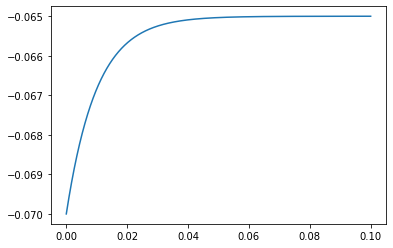

In [11]:
import pylab as plt
import numpy as np

Rm = 50e6 # Resistance
Res = 1/Rm 
Cm = 200e-12 # Capacitance
Ve = -70e-3 # Resting potential
Vth = -40e-3 # Threshold Voltage
Vres = -80e-3 # Reset Voltage

DelT = 10e-6 # Time Step
totaltime = 0.1 #Sec
time = np.arange(0, totaltime+DelT, DelT)

#voltage array
Voltage = np.zeros(len(time))
Voltage[0] = Ve

#Current Array
i = 100e-12
I = np.zeros(len(time))
for j in range(len(I)):
    I[j] = i

def leakAndFireIntegrated(i):
    V = (I[i] - Res*(Voltage[i-1] - Ve))/Cm
    Voltage[i] = Voltage[i - 1] + V*DelT    

for i in range(1, len(time)):
    leakAndFireIntegrated(i)
    
print('time', len(time),':', time)
print('Voltage:', Voltage)

plt.plot(time, Voltage)




# import pylab as plt
# import numpy as np
# 
# Rm = 50e6 # Resistance
# Res = 1/Rm 
# Cm = 200e-12 # Capacitance
# Ve = -70e-3 # Resting potential
# Vth = -40e-3 # Threshold Voltage
# Vres = -80e-3 # Reset Voltage
# 
# DelT = 10e-6 # Time Step
# totaltime = 0.1 #Sec
# time = np.arange(0, totaltime+DelT, DelT)
# 
# #voltage array
# Voltage = np.zeros(len(time))
# Voltage[0] = Ve
# 
# #Current Array
# i = 100e-12
# I = np.zeros(len(time))
# for j in range(len(I)):
#     I[j] = i
# 
# def leakAndFireIntegrated(i):
#     V = (I[i] - Res*(Voltage[i-1] - Ve))/Cm
#     Voltage[i] = Voltage[i - 1] + V*DelT    
# 
# for i in range(1, len(time)):
#     leakAndFireIntegrated(i)
#     
# print('time', len(time),':', time)
# print('Voltage:', Voltage)
# 
# plt.plot(time, Voltage)







In [ ]:


# import pylab as plt
# import numpy as np
# # import sys
# from scipy.integrate import odeint
# from scipy.interpolate import interp1d
# # np.set_printoptions(threshold=sys.maxsize)
# 
# _R_M = 50e6  # MOhm -> in kOhm
# _C_M = 200e-12  # pF -> in uF
# _V_E = -70.0  # mV
# _V_TH = -40.0  # mV
# _V_RESET = -80.0 # mV 
# 
# _I_Max = 10e-9 #nA
# _I_Step = 10e-12 #pA
# 
# _NUM_STEPS = int(_I_Max/_I_Step)
# _DELTA_T = 10e-6  # uS
# 
# t_stimulate = 5
# 
# time = np.arange(0, t_stimulate, _DELTA_T)
# ts = time
# i_m0s = [100e-12, 1e-9, 10e-9]
# # 
# # vMs = np.zeros(len(ts))
# # vMs[0] = _V_E
# # 
# # def getVoltage(i_m):
# #     for i, t in enumerate(ts):        
# #         if t > 0:
# #             vm = vMs[i-1] + (-vMs[i-1] + i_m * _R_M) / _C_M * _DELTA_T
# #             if vm >= _V_TH:
# #                 # vMs[i] += _V_RESET
# #                 vMs[i] = _V_RESET if vm >= _V_TH else vm
# #                 # t_rest = t + _C_M               
# #     return vMs
# # 
# # s_0, s_1, s_2 = np.array(list(map(lambda i_m: getVoltage(i_m), i_m0s)))
# # len(s_0)
# # plt.plot(ts, s_0, 'b')
# # # plt.plot(ts, s_1, 'b')
# # # plt.plot(ts, s_2, 'b')
# 
# 
# 
# # frequency model constants
# _T_REF = 3e-3 # mS
# 
# time2 = np.linspace(0, _NUM_STEPS * _DELTA_T, _NUM_STEPS)
# i_range = np.linspace(0, _I_Max, _NUM_STEPS)
# 
# # ifunc = interp1d(time2, i_range, bounds_error=False, fill_value="extrapolate")
# # map(lambda ii: print(ifunc(ii)), time2)
# # print(time2)
# 
# def threshold(vm):
#     v = vm if vm < _V_TH else _V_RESET
#     # print('vm',vm, 'v', v)
#     return v
#     
# def voltage_Model(vm, t, i_m):    
#     vm = threshold(vm)
#     dVdt = ((-1.0 * (1.0 / _R_M) * (vm - _V_E)) + i_m) / _C_M
#     return dVdt
# 
# counter = 0
# 
# def voltage_Model_Sweep(vm, t):    
#     global counter
#     i_m = i_range[counter] if counter < len(i_range) else _I_Max
#     vm = threshold(vm)
#     print('i_m', i_m, 'vm', vm)
#     dVdt = ((-1.0 * (1.0 / _R_M) * (vm - _V_E)) +  i_m) / _C_M 
#     counter = counter + 1
#     return dVdt
# 
# def iGreaterThanThreshold(i):
#     return (_T_REF - _R_M * _C_M * np.log(1 - (_V_TH / (i * _R_M)))) ** -1
# 
# def frequency_Model(i):
#     i_f = 0 if i <= ((_V_TH - _V_E) / _R_M) else iGreaterThanThreshold(i)
#     return i_f
# 
# plot_100pA = odeint(voltage_Model, _V_E, ts, args=(i_m0s[0],))
# plot_1nA = odeint(voltage_Model, _V_E, ts, args=(i_m0s[1],))
# plot_10nA = odeint(voltage_Model, _V_E, ts, args=(i_m0s[2],))
# # plot_sweep = odeint(voltage_Model_Sweep, _V_E, time2)
# # plot_frequency = frequency_Model, _V_E, i_range)
# 
# fs = np.zeros(len(i_range))
# pds = np.zeros(len(i_range))
# 
# for ii in range(len(i_range)):
#     fs[ii] = frequency_Model(ii)
#     pds[ii] = fs[ii]**-1 if fs[ii] != 0.0 else 0.0 
# 
# print('fs', fs)
# print('pds', pds)
# 
# plt.figure()
# plt.subplot(5, 1, 1)
# plt.title('Leaky Integrate and Fire')
# plt.plot(ts, plot_100pA, 'r')
# plt.ylabel('$V (mV)$')
# plt.xlabel('$t (s)$')
# # plt.grid()
# 
# plt.subplot(5, 1, 2)
# plt.plot(ts, plot_1nA, 'g')
# plt.ylabel('$V (mV)$')
# plt.xlabel('$t (s)$')
# # plt.grid()
# 
# plt.subplot(5, 1, 3)
# plt.plot(ts, plot_10nA, 'b')
# plt.ylabel('${V} \;(mV)$')
# plt.xlabel('$t (s)$')
# # plt.grid()
# # plt.show()
# 
# plt.subplot(5, 1, 4)
# # plt.plot(time2, plot_sweep, 'b')
# plt.ylabel('${V} \;(mV)$')
# plt.xlabel('$t (s)$')
# # plt.grid()
# # plt.show()
# 
# plt.subplot(5, 1, 5)
# plt.plot(i_range, pds, 'b')
# plt.ylabel('${period} \;()$')
# plt.xlabel('$t (s)$')
# # plt.grid()
# # plt.show()
# 
# print('Counter:', counter)

#### Q.4

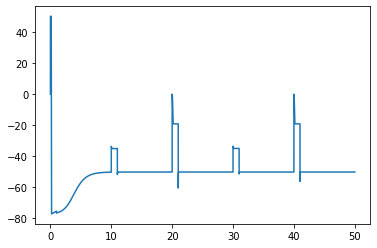

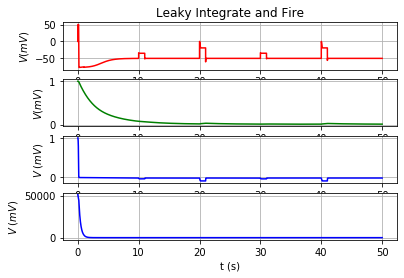

In [2]:
import pylab as plt
import numpy as np
from scipy.integrate import odeint

_V_E = -70  # mV
V_m_0 = _V_E # mV
_Cm = 200e-9  # in uF
_gK = 36.0  # mS
_gNA = 120.0  # mS
_gL = 0.3  # mS
_V_Na = 50  # mV
_V_K = -77 # mV
_V_L = -50 # mV
t = np.linspace(0.0, 50.0, 10000)

currentAdjust = 10

def i_ssf(t):
        if 0.0 < t < 1.0:
            return 150.0/currentAdjust
        elif 10.0 < t < 11.0:
            return 50.0/currentAdjust
        elif 20.0 < t < 21.0:
            return 150.0/currentAdjust
        elif 30.0 < t < 31.0:
            return 50.0/currentAdjust
        elif 40.0 < t < 41.0:
            return 150.0/currentAdjust
        elif 50.0 < t < 51.0:
            return 50.0/currentAdjust
        return 0.0

def alphaNf(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp((10.0 - Vm) / 10.0) - 1.0)

def alphaMf(Vm):
    return 0.1 * (25.0 - Vm) / (np.exp((25.0 - Vm) / 10.0)) - 1.0

def alphaHf(Vm):
    return 0.07 * np.exp((-1.0 * Vm) / 20.0)

def betaNf(Vm):
    return 0.125 * np.exp((-1.0 * Vm) / 80.0)
    
def betaMf(Vm):
    return 4.0 * np.exp((-1.0 * Vm) / 18.0)
    
def betaHf(Vm):
    return 1.0 / (np.exp((30.0 - Vm) / 10.0) + 1.0)
    
def model(z, t):
    dS = np.zeros(4)
    Vm = z[0]
    n = z[1]
    m = z[2]
    h = z[3]
    dS[0] = (i_ssf(t) - ((_gK * n**4 * (Vm - _V_K)) + (_gNA * m**3 * h * (Vm- _V_Na)) + (_gL * (Vm - _V_L)))) / _Cm
    dS[1] = alphaNf(Vm) * (1.0 - n) - betaNf(Vm) * n
    dS[2] = alphaMf(Vm) * (1.0 - m) - betaMf(Vm) * m
    dS[3] = alphaHf(Vm) * (1.0 - h) - betaHf(Vm) * h
    return dS

z0 = np.array([0.0, (1.0 + alphaNf(V_m_0)/betaNf(V_m_0)), (1.0 + alphaMf(V_m_0)/betaMf(V_m_0)), (1.0 + alphaHf(V_m_0)/betaHf(V_m_0))])
s = odeint(model, z0, t)
plt.plot(t, s[:,0])

plt.figure()
plt.subplot(4, 1, 1)
plt.title('Leaky Integrate and Fire')
plt.plot(t, s[:,0], 'r')
plt.ylabel('$V (mV)$')
plt.xlabel('$t (s)$')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, s[:,1], 'g')
plt.ylabel('$V (mV)$')
plt.xlabel('$t (s)$')
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, s[:,2], 'b')
plt.ylabel('${V} \;(mV)$')
plt.xlabel('$t (s)$')
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(t, s[:,3], 'b')
plt.ylabel('${V} \;(mV)$')
plt.xlabel('t (s)')
plt.grid()
plt.show()